## Predicting Insurance Claim Amounts

###   Objective:
###                 Estimate the medical insurance claim amount based on personal data.

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analysis

In [2]:
#loading the dataset from the csv file to a pandas dataframe

In [3]:
insurance_dataset=pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#no. of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
#information about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking for null values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## categorical features
### sex
### region
### smoker

In [8]:
# Statistical measures of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

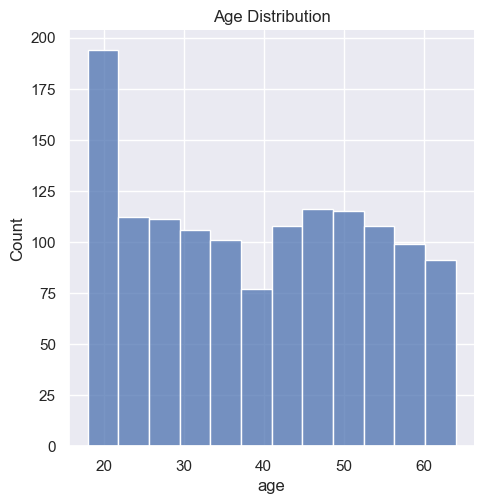

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

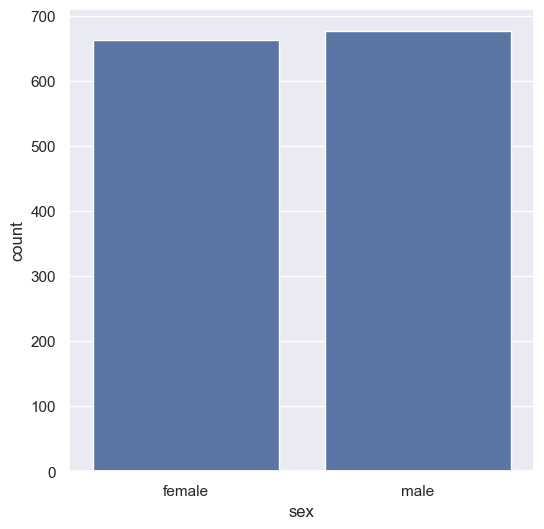

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.show('sex distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

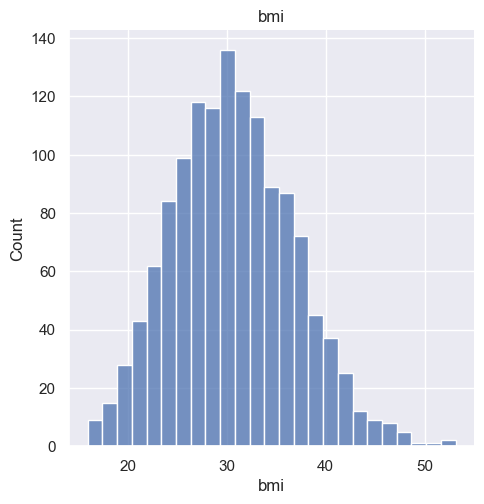

In [12]:
#bmi column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('bmi')
plt.show()

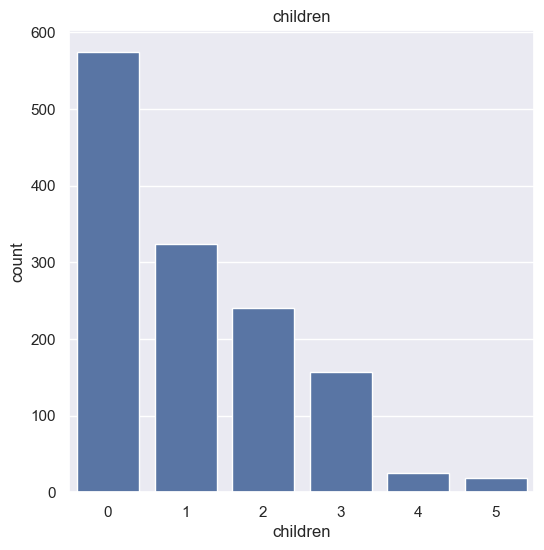

In [13]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

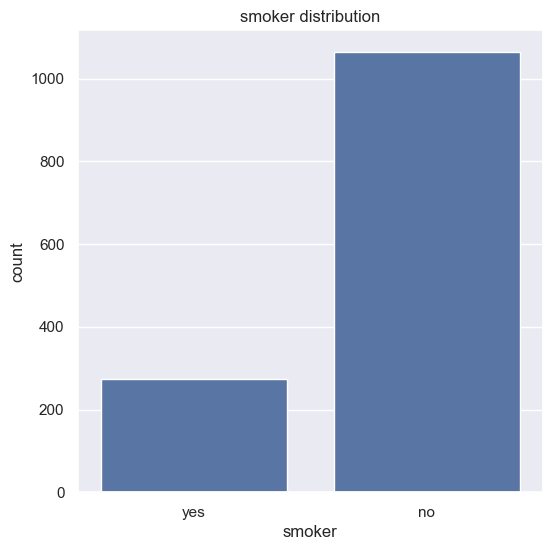

In [14]:
#smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker distribution')
plt.show()

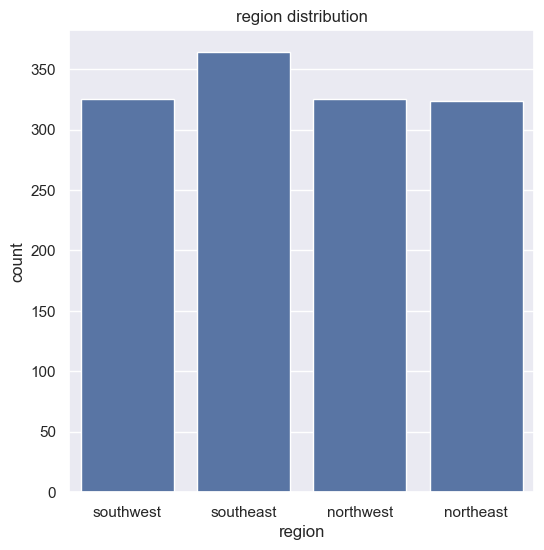

In [15]:
#region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region distribution')
plt.show()

 ## Visualize how BMI, age, and smoking status impact insurance charges.

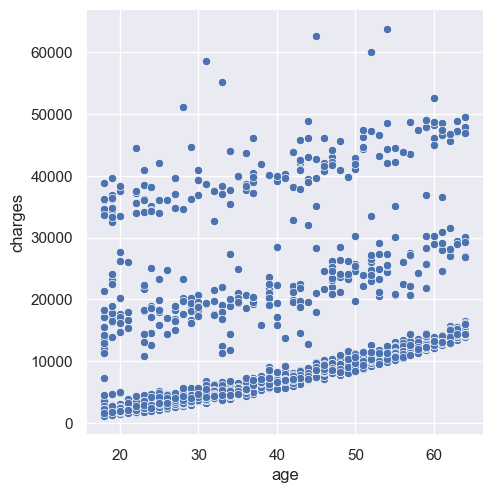

In [16]:
# Pairplot for numeric features
sns.pairplot(insurance_dataset, x_vars=['age'], y_vars='charges', height=5, aspect=1, kind='scatter')
plt.show()

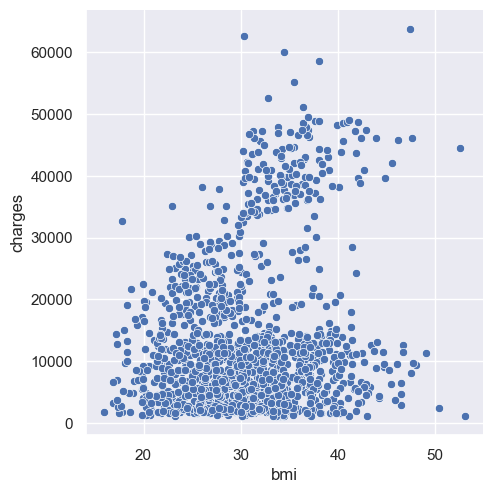

In [17]:
# Pairplot for numeric features
sns.pairplot(insurance_dataset, x_vars=['bmi'], y_vars='charges', height=5, aspect=1, kind='scatter')
plt.show()

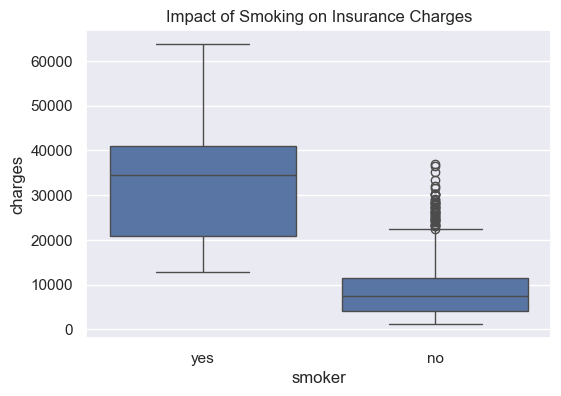

In [18]:
# Boxplot for smoking status vs charges
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=insurance_dataset)
plt.title("Impact of Smoking on Insurance Charges")
plt.show()

### Observation: Charges usually increase with age, BMI, and if the person is a smoker.



# Data preprocessing

## Encoding the categorical features

In [19]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace =True)
insurance_dataset.replace({'region':{'southwest':1,'southeast':0,'northwest':3,'northeast':2}},inplace =True)


C:\Users\PCS\AppData\Local\Temp\ipykernel_2392\3676699290.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\PCS\AppData\Local\Temp\ipykernel_2392\3676699290.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace =True)
C:\Users\PCS\AppData\Local\Temp\ipykernel_2392\3676699290.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [20]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## spliting the feature and target


In [41]:
X=insurance_dataset.drop(columns='charges',axis=1)#1 represent column and 0 represent row in axis
Y=insurance_dataset['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## trainng and testing

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [26]:
print(Y.shape,Y_train.shape,Y_test.shape)


(1338,) (1070,) (268,)


# Model Training

## Linear Regression

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

In [30]:
y_pred = regressor.predict(X_test)


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(Y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4267.213826730734
Root Mean Squared Error (RMSE): 6191.690842285234
